# 과대적합(Overfitting )

- ### 일반화 (Generalization) : 새로운 데이터에 대한 학습(내가 가진데이터에 적합한게 아니라)
    - 모델이 새로운 데이터셋(테스트 데이터)에 대하여 정확히 예측하면 이것을 (훈련데이터에서 테스트데이터로) 일반화 되었다고 말한다. 
    - 모델이 훈련 데이터로 평가한 결과와 테스트 데이터로 평가한 결과의 차이가 거의 없고 좋은 평가지표를 보여준다.
- ### 과대적합 (Overfitting) : 성능이 나아질 가능성이 이쓴것
    - 모델이 훈련 데이터에 대한 예측성능은 **너무** 좋지만 일반성이 떨어져 새로운 데이터(테스트 데이터)에 대해선 성능이 좋지 않은 것을 Overfitting이라고 한다. 
    - 이는 모델이 훈련 데이터 세트의 특징을 너무 맞춰서 학습 되었기 때문에 일반화 되지 않아 새로운 데이터셋(테스트세트)에 대한 예측 성능이 떨져 발생한다.-> 데이터에 비해 모델이 너무 복잡한것(계속 물어봐)
    - 데이터를 더 많이 주거나(한계존재), 모델을 간단하게.
        
- ### 과소적합 (Underfitting)
    - 모델이 훈련 데이터과 테스트 데이터셋 모두에서 성능이 안좋은 것을 말한다.
    - 모델이 너무 간단하여 훈련 데이터에 대해 충분히 학습하지 못해 데이터셋의 패턴들을 다 찾아내지 못해서 발생한다.
    
- 딥러닝은 모델자체가 태생이 복접해서 과소적합은 거의 안일어나고 과대적합이 많이 일어남`ㅡㅡ

## Overfitting(과대적합)의 원인
- 모델이 너무 복잡한 경우
    - Overfitting을 줄이기 위한 규제 하이퍼파라미터 설정 : 규제를 한다.
    - Feature 개수 줄이기 : 서로 비슷한 컬럼을 합치거나, 결론 도출하는데 도움 안되는 컬럼 삭제
- 데이터의 문제
    - 데이터 전처리를 통해 질 좋은 데이터를 만든다.
    - 데이터를 더 수집한다. 
        - 현실적으로 어려운 경우가 많다.(비용과 시간의 문제)
        
        이미지에 딥러닝이 적합한 경우(컬럼 수 많다) : 이미지는 1000개인데 컬럼인 엄청 많아-> 복잡한 딥러닝모델을 써줘야( 한픽셀이 한컬럼)`

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 1)

In [2]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train,y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [4]:
print('train 정확도:', accuracy_score(y_train, pred_train))
print('test 정확도 : ', accuracy_score(y_test, pred_test))

train 정확도: 1.0
test 정확도 :  0.9300699300699301


In [5]:
tree.predict_proba(X_train)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [6]:
tree.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [7]:
import numpy as np
np.unique(y_train, return_counts = True)

(array([0, 1]), array([159, 267], dtype=int64))

In [8]:
cancer['target_names'] # 악성, 양성 여기서 악성이 포시티브.

array(['malignant', 'benign'], dtype='<U9')

In [10]:
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(export_graphviz(tree,
                              out_file = None,
                              feature_names = cancer['feature_names'],
                              class_names = cancer['target_names'],
                              rounded = True,
                              filled= True))

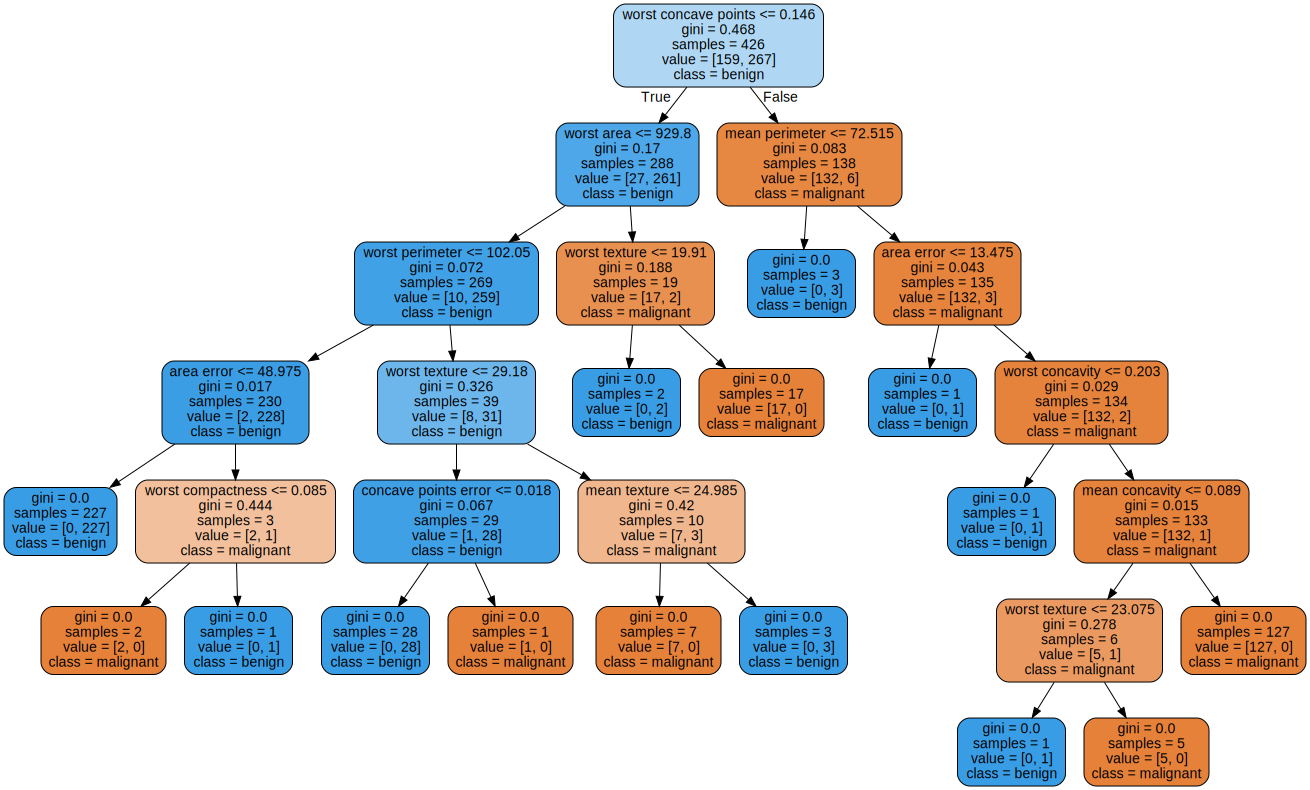

In [11]:
graph

In [ ]:
 #source 객체에다가 graphviz함수를 넣어서 리턴해주는 값을 대입 : 꼭 필요한 매개변순ㄴ 학습한 모델임
    
    #gini : 복잡도, 우리가 예측할 애들이 class 별로 얼마나 섞여 있는지-> 가장 복잡한게 0.5(레이블들이 반반씩 있는 것)
    # 이 아래 대답은 이전 질문에 대한 대답임
    #파란색이 1이고 주황색이 0이었나
    #feature_names = cancer['feature_names'], 이렇게 컬럼을 지정하지 않으면, 질문을 보기가 어려움. -> X_train에는 컬럼 값없고 데이터만 있어서
    # value = [0번 값 개수, 1번값 개수]/ class : 큰것의 타겟값.
    
    # gini 값이 0에 가까워질수록 한쪽에 값에 가깝게 분류된것.-> 이게 최대한 낮아질 수 있는 질문을 모델이 찾는 것
    
    # 3번째까지만 묻고 4번째 부터는 묻지마 -> 모델을 간결하게 : 오히려 이정도만 하면 test에 대해서는 성능을 높일 수 있음.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(X_train,y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [14]:
print(accuracy_score(y_train, pred_train))
accuracy_score(y_test,pred_test)

0.971830985915493


0.9440559440559441

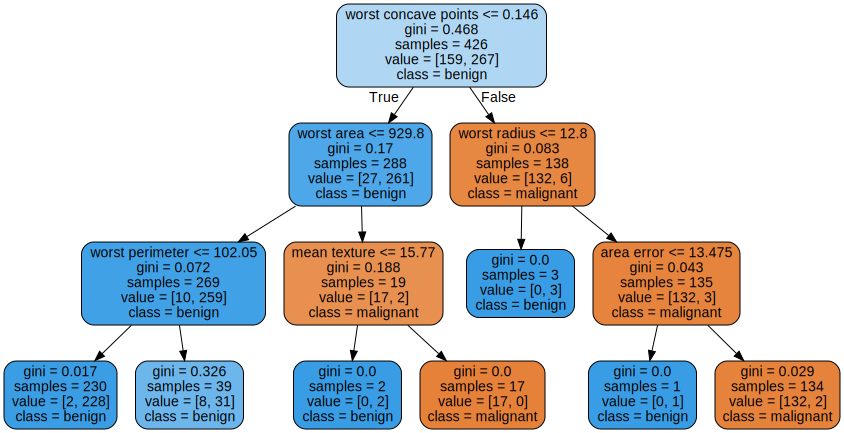

In [15]:
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(export_graphviz(tree,
                              out_file = None,
                              feature_names = cancer['feature_names'],
                              class_names = cancer['target_names'],
                              rounded = True,
                              filled = True))

graph

In [16]:
tree.predict_proba(X_test)

array([[0.98507463, 0.01492537],
       [0.98507463, 0.01492537],
       [0.20512821, 0.79487179],
       [1.        , 0.        ],
       [0.98507463, 0.01492537],
       [0.00869565, 0.99130435],
       [0.00869565, 0.99130435],
       [0.00869565, 0.99130435],
       [0.98507463, 0.01492537],
       [0.00869565, 0.99130435],
       [0.00869565, 0.99130435],
       [0.98507463, 0.01492537],
       [0.00869565, 0.99130435],
       [0.00869565, 0.99130435],
       [0.98507463, 0.01492537],
       [0.00869565, 0.99130435],
       [0.00869565, 0.99130435],
       [0.98507463, 0.01492537],
       [0.00869565, 0.99130435],
       [0.98507463, 0.01492537],
       [0.00869565, 0.99130435],
       [0.00869565, 0.99130435],
       [1.        , 0.        ],
       [0.98507463, 0.01492537],
       [0.98507463, 0.01492537],
       [0.00869565, 0.99130435],
       [0.98507463, 0.01492537],
       [0.98507463, 0.01492537],
       [0.98507463, 0.01492537],
       [0.98507463, 0.01492537],
       [0.

## Decision Tree 복잡도 제어(규제)
- Decision Tree 모델을 복잡하게 하는 것은 노드가 너무 많이 만들어 지는 것이다. 
    - 노드가 많이 만들어 질수록(뎁스가 깊어질 수록) 훈련데이터셋에 과대적합된다.
- 적절한 시점에 트리 생성을 중단해야 한다.
- 규제  하이퍼파라메터
    - max_depth : tree의 최대 깊이를 제한
    - max_leaf_nodes : leaf node의 최대개수를 제한(leaf_node : 더이상 자식 node를 가지지 않는 마지막 노드-> 박스 하나하나가 노드/ 시작하는 애가 루트노드
    - min_sample_leaf : leaf node가 되기 위한 sample 수 지정 -> 리프노드가 아니더라도 sample 수가 이 갯수 미만이면 리프노드로 파악

# GridSearch (그리드 서치)

## 적당한 max_depth 찾기
- 하이퍼파라미터 튜닝이라고 함.
- 하이퍼파라미터라고 하는 이유는 파라미터랑 구분하기 위함
    - 파라미터는 머신러닝에서 찾아야할 값? 11:24~11:26
- 근데 트리만봐도 하이퍼파라미터 종류가 엄청 많은데 밑에서는 max_depth만 본것
    - 다른 하이퍼파라미터에 대한 값은 안찾아봤는데, 각각을 조회해서 성능이 가장 높았던 것을 조합한다고 최고가 되는게 아니고 조합 자체에서 최고가 되는 것을 찾아야해
    - 만약 하이퍼파라미터 3개를 보겠다 하면 각각 후보를 10개씩 지정할 때 조합은 1000개 -> for 문을 3번 돌려줘야 -> 이게 그리드서치라고 함(라이브러리가 있는것, 반복문에서 가능하다는 건 공통적인 일처리라는 것이라서 라이브러리 만들어놔씀)

In [19]:
depth_list = range(1,11)

train_acc_list=[]
test_acc_list=[]

for depth in depth_list:
    tree = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    tree.fit(X_train,y_train)
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train,pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [20]:
import pandas as pd
result = pd.DataFrame(dict(max_depth = depth_list, train = train_acc_list, test = test_acc_list))
result

,max_depth,train,test
0,1,0.922535,0.902098
1,2,0.964789,0.937063
2,3,0.971831,0.944056
3,4,0.985915,0.930070
4,5,0.997653,0.930070
5,6,1.000000,0.930070
6,7,1.000000,0.930070
7,8,1.000000,0.930070
8,9,1.000000,0.930070
9,10,1.000000,0.930070


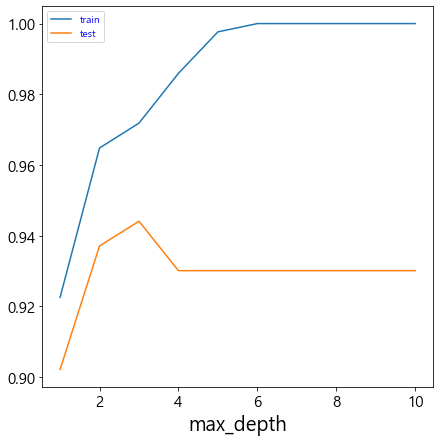

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.plot(depth_list, train_acc_list, label = 'train')
plt.plot(depth_list, test_acc_list, label = 'test')

plt.xlabel('max_depth')
plt.legend()
plt.show()

In [30]:
import numpy as np


result.columns

Index(['max_depth', 'train', 'test'], dtype='object')

## Grid Search 를 이용한 하이퍼파라미터 튜닝
- 하이퍼 파라미터 (Hyper Parameter)
    - 머신러닝 모델을 생성할 때 사용자가 직접 설정하는 값
    - 머신러닝 모델에 따라 다르기는 하지만 많은 하이퍼파라미터들을 변경할 수 있다.
- 하이퍼 파라미터 튜닝
    - 하이퍼 파라미터의 설정에 따라 모델의 성능이 달라진다.

## 최적의 하이퍼파라미터 찾기
1. 만족할 만한 하이퍼파라미터들의 값의 조합을 찾을 때 까지 일일이 수동으로 조정
2. GridSearch 사용
    - GridSearchCV()
        - 시도해볼 하이퍼파라미터들을 지정하면 모든 조합에 대해 교차검증 후 제일 좋은 성능을 내는 하이퍼파라미터 조합을 찾아준다.
        - 적은 수의 조합의 경우는 괜찮지만 시도할 하이퍼파라미터와 값들이 많아지면 너무 많은 시간이 걸린다.
        - cv: cross validation 의 약자, 교차검증까지 해줌
3. Random Search 사용    
    - RandomizedSearchCV()
        - GridSeach와 동일한 방식으로 사용한다.
        - 모든 조합을 다 시도하지 않고 각 반복마다 임의의 값만 대입해 지정한 횟수만큼만 평가한다.
        - 보통 랜덤으로 60개를 주면 나쁘지 않다고 함(이론적 근거아니고 실험)
        - random search 를 이용해 최적의 값을 찾고, 그 근처값을 범위로 다시 그리드서치를 통해 정확도를 높이는 방법도 있음

### GridSearchCV 매개변수및 결과조회
- 주요 매개변수 : 모델 만드는 과정
    - estimator: 모델객체 지정(학습되지 않은)
    - params : 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - scoring: 평가 지표
    - cv : 교차검증시 fold 개수. 
    - n_jobs : 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)
- 메소드
    - fit(X, y) : 학습 -> 조합별로 for 문 돌리는것 여기서 하는 것.
    - predict(X): 제일 좋은 성능을 낸 모델로 predict()
    - predict_proba(X): 제일 좋은 성능을 낸 모델로 predict_proba() 호출
- 결과 조회 변수 : 싸이킷런에서 변수는 _붙여서 변수라는 것을 표시
    - cv_results_ : 파라미터 조합별 결과 조회
    - best_params_ : 가장 좋은 성능을 낸 parameter 조합 조회
    - best_estimator_ : 가장 좋은 성능을 낸 모델 반환
        

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X,y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split (X,y, stratify = y, random_state = 1)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
# 하이퍼파라미터 후보 딕셔너리로 지정, 지정하지 않은 것은 defualt
param_grid = {
    'max_depth':range(1,11),
    'max_leaf_nodes':[3,5,7,9],
    'random_state':[1]
}

grid_search = GridSearchCV(tree,
                           param_grid = param_grid, #하이퍼파라미터 후보
                           scoring = ['accuracy','recall','precision'],
                           refit = 'accuracy',
                           cv = 5,
                           n_jobs=1)

In [47]:
#학습

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': range(1, 11),
                         'max_leaf_nodes': [3, 5, 7, 9], 'random_state': [1]},
             refit='accuracy', scoring=['accuracy', 'recall', 'precision'])

In [48]:
#평가
from sklearn.metrics import accuracy_score
pred_train = grid_search.predict(X_train) # 가장 성능이 잘나온 파라미터를 가진 tree 모델로 에측
accuracy_score(y_train, pred_train)

0.9577464788732394

In [49]:
cv_results_ : 파라미터 조합별 결과 조회
best_params_ : 가장 좋은 성능을 낸 parameter 조합 조회
best_estimator_ : 가장 좋은 성능을 낸 모델 반환

SyntaxError: invalid syntax (<ipython-input-49-c0d7bb876dd3>, line 1)

In [50]:
grid_search.cv_results_

{'mean_fit_time': array([0.00240078, 0.00199466, 0.00180798, 0.00161772, 0.00238705,
        0.00219159, 0.00259213, 0.00242348, 0.00281944, 0.00299845,
        0.00297551, 0.00319266, 0.00299153, 0.0034925 , 0.00358958,
        0.0037899 , 0.00298543, 0.0034029 , 0.00438704, 0.00398932,
        0.00319147, 0.00458755, 0.00399175, 0.00398669, 0.00319142,
        0.00319066, 0.00352731, 0.00439768, 0.00300064, 0.0035903 ,
        0.00398889, 0.00418868, 0.00319843, 0.00345988, 0.00417824,
        0.00436611, 0.00320225, 0.00379639, 0.00319734, 0.00418139]),
 'std_fit_time': array([4.83010871e-04, 6.29998228e-04, 4.05827346e-04, 5.06674056e-04,
        4.78539599e-04, 3.99571711e-04, 5.12216367e-04, 4.83628110e-04,
        3.86654506e-04, 2.86830928e-05, 1.58374555e-05, 3.98175159e-04,
        6.31128045e-04, 4.46207122e-04, 4.88480429e-04, 3.99115920e-04,
        1.51409126e-05, 4.90381392e-04, 7.98784830e-04, 6.30456837e-04,
        3.99470596e-04, 1.84920088e-03, 2.13448419e-05, 6.355

In [51]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_random_state,params,split0_test_accuracy,split1_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.002401,4.830109e-04,0.002785,0.000754,1,3,1,"{'max_depth': 1, 'max_leaf_nodes': 3, 'random_...",0.872093,0.882353,...,0.063856,37,0.830769,0.879310,0.910714,0.955556,0.892857,0.893841,0.040703,37
1,0.001995,6.299982e-04,0.002392,0.001016,1,5,1,"{'max_depth': 1, 'max_leaf_nodes': 5, 'random_...",0.872093,0.882353,...,0.063856,37,0.830769,0.879310,0.910714,0.955556,0.892857,0.893841,0.040703,37
2,0.001808,4.058273e-04,0.001983,0.000643,1,7,1,"{'max_depth': 1, 'max_leaf_nodes': 7, 'random_...",0.872093,0.882353,...,0.063856,37,0.830769,0.879310,0.910714,0.955556,0.892857,0.893841,0.040703,37
3,0.001618,5.066741e-04,0.001780,0.000392,1,9,1,"{'max_depth': 1, 'max_leaf_nodes': 9, 'random_...",0.872093,0.882353,...,0.063856,37,0.830769,0.879310,0.910714,0.955556,0.892857,0.893841,0.040703,37
4,0.002387,4.785396e-04,0.001588,0.000483,2,3,1,"{'max_depth': 2, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1
5,0.002192,3.995717e-04,0.001796,0.000399,2,5,1,"{'max_depth': 2, 'max_leaf_nodes': 5, 'random_...",0.918605,0.952941,...,0.022197,9,0.912281,0.962963,0.925926,0.923077,0.962264,0.937302,0.021163,17
6,0.002592,5.122164e-04,0.001399,0.000510,2,7,1,"{'max_depth': 2, 'max_leaf_nodes': 7, 'random_...",0.918605,0.952941,...,0.022197,9,0.912281,0.962963,0.925926,0.923077,0.962264,0.937302,0.021163,17
7,0.002423,4.836281e-04,0.001588,0.000484,2,9,1,"{'max_depth': 2, 'max_leaf_nodes': 9, 'random_...",0.918605,0.952941,...,0.022197,9,0.912281,0.962963,0.925926,0.923077,0.962264,0.937302,0.021163,17
8,0.002819,3.866545e-04,0.001775,0.000389,3,3,1,"{'max_depth': 3, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1
9,0.002998,2.868309e-05,0.001396,0.000489,3,5,1,"{'max_depth': 3, 'max_leaf_nodes': 5, 'random_...",0.918605,0.929412,...,0.025739,1,0.898305,0.928571,0.925926,0.941176,0.962264,0.931249,0.020887,29


In [52]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'param_random_state',
       'params', 'split0_test_accuracy', 'split1_test_accuracy',
       'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy',
       'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
       'split0_test_recall', 'split1_test_recall', 'split2_test_recall',
       'split3_test_recall', 'split4_test_recall', 'mean_test_recall',
       'std_test_recall', 'rank_test_recall', 'split0_test_precision',
       'split1_test_precision', 'split2_test_precision',
       'split3_test_precision', 'split4_test_precision', 'mean_test_precision',
       'std_test_precision', 'rank_test_precision'],
      dtype='object')

In [54]:
df[['mean_test_accuracy', 'rank_test_accuracy', 'mean_test_recall', 'rank_test_recall']]

,mean_test_accuracy,rank_test_accuracy,mean_test_recall,rank_test_recall
0,0.885007,37,0.932285,37
1,0.885007,37,0.932285,37
2,0.885007,37,0.932285,37
3,0.885007,37,0.932285,37
4,0.927250,1,0.939972,12
5,0.927250,1,0.947449,9
6,0.927250,1,0.947449,9
7,0.927250,1,0.947449,9
8,0.927250,1,0.939972,12
9,0.924897,13,0.951153,1


In [55]:
df.sort_values('rank_test_accuracy')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_random_state,params,split0_test_accuracy,split1_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision
12,0.002992,6.311280e-04,0.001596,0.000488,4,3,1,"{'max_depth': 4, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1
20,0.003191,3.994706e-04,0.001995,0.000001,6,3,1,"{'max_depth': 6, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1
28,0.003001,6.130489e-04,0.001588,0.000482,8,3,1,"{'max_depth': 8, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1
16,0.002985,1.514091e-05,0.001796,0.000400,5,3,1,"{'max_depth': 5, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1
32,0.003198,4.238223e-04,0.002194,0.000397,9,3,1,"{'max_depth': 9, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1
8,0.002819,3.866545e-04,0.001775,0.000389,3,3,1,"{'max_depth': 3, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1
7,0.002423,4.836281e-04,0.001588,0.000484,2,9,1,"{'max_depth': 2, 'max_leaf_nodes': 9, 'random_...",0.918605,0.952941,...,0.022197,9,0.912281,0.962963,0.925926,0.923077,0.962264,0.937302,0.021163,17
24,0.003191,3.996196e-04,0.001197,0.000399,7,3,1,"{'max_depth': 7, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1
5,0.002192,3.995717e-04,0.001796,0.000399,2,5,1,"{'max_depth': 2, 'max_leaf_nodes': 5, 'random_...",0.918605,0.952941,...,0.022197,9,0.912281,0.962963,0.925926,0.923077,0.962264,0.937302,0.021163,17
4,0.002387,4.785396e-04,0.001588,0.000483,2,3,1,"{'max_depth': 2, 'max_leaf_nodes': 3, 'random_...",0.918605,0.952941,...,0.018705,12,0.912281,0.980769,0.943396,0.923077,0.961538,0.944212,0.024914,1


In [57]:
best_param = grid_search.best_params_
best_param

{'max_depth': 2, 'max_leaf_nodes': 3, 'random_state': 1}

In [59]:
best_estimator = grid_search.best_estimator_
best_estimator

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, random_state=1)

In [60]:
pr = best_estimator.predict(X_train)
accuracy_score(y_train, pr)

0.9577464788732394

In [61]:
#최종검증
pred_test = best_estimator.predict(X_test)
accuracy_score(y_test, pred_test)

0.9300699300699301

### RandomizedSearchCV
- 주요 매개변수
    - estimator: 모델객체 지정
    - param_distributions : 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - n_iter : 파라미터 검색 횟수
    - scoring: 평가 지표
    - cv : 교차검증시 fold 개수. 
    - n_jobs : 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)
- 메소드
    - fit(X, y) : 학습
    - predict(X): 제일 좋은 성능을 낸 모델로 predict()
    - predict_proba(X): 제일 좋은 성능을 낸 모델로 predict_proba() 호출
- 결과 조회 변수
    - cv_results_ : 파라미터 조합별 결과 조회
    - best_params_ : 가장 좋은 성능을 낸 parameter 조합 조회
    - best_estimator_ : 가장 좋은 성능을 낸 모델 반환

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
tree = DecisionTreeClassifier()
param_grid = {
    'max_depth':range(1,21),
    'max_leaf_nodes':range(2,11),
    'criterion':['gini','entropy'],
    'random_state':[1]
    
}

n_iter = 50
randomized_search = RandomizedSearchCV(tree,
                                      param_distributions = param_grid,
                                      n_iter = n_iter,
                                      scoring = 'accuracy',
                                      cv = 3,
                                      n_jobs = -1)

In [64]:
#학습
randomized_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 21),
                                        'max_leaf_nodes': range(2, 11),
                                        'random_state': [1]},
                   scoring='accuracy')

In [67]:
df = pd.DataFrame(randomized_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006930,2.149908e-03,0.001060,1.289944e-04,1,3,8,gini,"{'random_state': 1, 'max_leaf_nodes': 3, 'max_...",0.922535,0.915493,0.964789,0.934272,0.021769,5
1,0.013631,4.486649e-03,0.001359,4.524390e-04,1,9,18,gini,"{'random_state': 1, 'max_leaf_nodes': 9, 'max_...",0.908451,0.915493,0.943662,0.922535,0.015213,16
2,0.009972,2.153726e-03,0.001331,4.697409e-04,1,2,9,gini,"{'random_state': 1, 'max_leaf_nodes': 2, 'max_...",0.873239,0.887324,0.915493,0.892019,0.017566,43
3,0.008976,1.946680e-07,0.000997,2.247832e-07,1,5,20,gini,"{'random_state': 1, 'max_leaf_nodes': 5, 'max_...",0.922535,0.929577,0.971831,0.941315,0.021769,1
4,0.014295,4.483874e-03,0.000997,8.991328e-07,1,3,14,gini,"{'random_state': 1, 'max_leaf_nodes': 3, 'max_...",0.922535,0.915493,0.964789,0.934272,0.021769,5
5,0.016953,4.230588e-03,0.001330,4.715955e-04,1,4,7,entropy,"{'random_state': 1, 'max_leaf_nodes': 4, 'max_...",0.929577,0.915493,0.901408,0.915493,0.011500,22
6,0.011635,3.082781e-03,0.002993,1.629565e-03,1,7,19,gini,"{'random_state': 1, 'max_leaf_nodes': 7, 'max_...",0.922535,0.915493,0.964789,0.934272,0.021769,5
7,0.005667,1.688928e-03,0.000982,2.186558e-05,1,5,1,gini,"{'random_state': 1, 'max_leaf_nodes': 5, 'max_...",0.873239,0.887324,0.915493,0.892019,0.017566,43
8,0.018631,1.221479e-02,0.000984,1.968394e-05,1,8,12,gini,"{'random_state': 1, 'max_leaf_nodes': 8, 'max_...",0.908451,0.915493,0.943662,0.922535,0.015213,16
9,0.009309,4.704713e-04,0.000999,1.106929e-06,1,5,8,gini,"{'random_state': 1, 'max_leaf_nodes': 5, 'max_...",0.922535,0.929577,0.971831,0.941315,0.021769,1


In [68]:
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.008976,1.946680e-07,0.000997,2.247832e-07,1,5,20,gini,"{'random_state': 1, 'max_leaf_nodes': 5, 'max_...",0.922535,0.929577,0.971831,0.941315,0.021769,1
39,0.008305,4.775211e-04,0.000980,2.315267e-05,1,5,9,gini,"{'random_state': 1, 'max_leaf_nodes': 5, 'max_...",0.922535,0.929577,0.971831,0.941315,0.021769,1
36,0.010280,3.416122e-03,0.000998,4.052337e-07,1,5,6,gini,"{'random_state': 1, 'max_leaf_nodes': 5, 'max_...",0.922535,0.929577,0.971831,0.941315,0.021769,1
9,0.009309,4.704713e-04,0.000999,1.106929e-06,1,5,8,gini,"{'random_state': 1, 'max_leaf_nodes': 5, 'max_...",0.922535,0.929577,0.971831,0.941315,0.021769,1
0,0.006930,2.149908e-03,0.001060,1.289944e-04,1,3,8,gini,"{'random_state': 1, 'max_leaf_nodes': 3, 'max_...",0.922535,0.915493,0.964789,0.934272,0.021769,5
20,0.010306,6.827544e-03,0.001994,1.410852e-03,1,3,12,gini,"{'random_state': 1, 'max_leaf_nodes': 3, 'max_...",0.922535,0.915493,0.964789,0.934272,0.021769,5
32,0.007328,1.229399e-03,0.000983,2.113052e-05,1,3,19,gini,"{'random_state': 1, 'max_leaf_nodes': 3, 'max_...",0.922535,0.915493,0.964789,0.934272,0.021769,5
34,0.008975,8.139069e-04,0.001023,3.546075e-05,1,4,9,gini,"{'random_state': 1, 'max_leaf_nodes': 4, 'max_...",0.922535,0.908451,0.971831,0.934272,0.027173,5
35,0.006980,8.148803e-04,0.001024,3.579686e-05,1,3,11,gini,"{'random_state': 1, 'max_leaf_nodes': 3, 'max_...",0.922535,0.915493,0.964789,0.934272,0.021769,5
12,0.009973,8.138096e-04,0.000997,4.899036e-07,1,7,20,gini,"{'random_state': 1, 'max_leaf_nodes': 7, 'max_...",0.922535,0.915493,0.964789,0.934272,0.021769,5


In [70]:
randomized_search.best_params_

{'random_state': 1, 'max_leaf_nodes': 5, 'max_depth': 20, 'criterion': 'gini'}

In [71]:
randomized_search.best_estimator_

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=5, random_state=1)

# 파이프라인 (Pipeline)
- 개요
    - 여러 단계의 머신러닝 프로세스 (전처리의 각 단계, 모델생성, 학습) 처리 과정을 설정하여 한번에 처리되도록 한다.
- 파이프라인은 여러개의 변환기와 마지막에 변환기 또는 추정기를 넣을 수 있다. (추정기-Estimator는 마지막에 만 올 수 있다.)
- 전처리 작업 파이프라인
    - 변환기들로만 구성 예) 라벨인코딩
- 전체 프로세스 파이프 라인
    - 마지막에 추정기를 넣는다 예)svm 이용해 학습 또는 추론 -> 추정기 쉽게 말해 모델은 마지막에 한개만 넣을 수 있음
    
    
    
- 단계가 3개가 있을 때 이걸 묶어서 한번에 실행할 수 있게 해줄 때 파이프라인 개념이 나옴
    - 즉 순서가 있는 애들 순차적으로 일을 해 최종결과를 낼 수 있을 때 이를 묶어서 한번에 처리할 수 있도록 하는 게 파이프라인 역할
    - 예 : 데이터전처리(스케일링) => svm(선형모델) -> 학습 과정에서 파이프라인을 만들면 이 과정이 한번에 처리됨
        - train set을 가지고 전처리 했기 때문에 전처리 한 걸로 학습해줘야 -> 이부분 설명 듣기!!!!! 아마 점심 직후.수업`

### Pipeline 생성
- (이름, 변환기) 를 리스트로 묶어서 전달한다. : 튜플로 묶어서 리스트로 제공, 순서가 중요해서 딕셔너리 말고 리스트 씀 (이름:객체)
- 마지막에는 추정기가 올 수있다.

### Pipeline 을 이용한 학습
- pipeline.fit() : 마지막까지 fit() 해주는 것
    - 각 순서대로 각 변환기의 fit_transform()이 실행되고 결과가 다음 단계로 전달된다. 마지막 단계에서는 fit()만 호출한다. - 마지막이 추정기일때
    - 보통 마지막이 추정기일때 사용
- pipeline.fit_transform()
    - fit()과 동일하나 마지막 단계에서도 fit_transform()이 실행된다.
    - 보통 전처리 작업 파이프라인(모든 단계가 변환기)일 때  사용

In [73]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [76]:
#전처리 후 svc로 분석하는 파이프라인

order = [
    ('scaler', StandardScaler()),
    ('svc', SVC())
]
pipeline = Pipeline(order, verbose = True)
print(pipeline.steps)

[('scaler', StandardScaler()), ('svc', SVC())]


In [77]:
#학습
pipeline.fit(X_train, y_train) # 마지막 단계에 fit 메소드사용

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())], verbose=True)

In [78]:
#추론
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [79]:
accuracy_score(y_train,pred_train), accuracy_score(y_test, pred_test)

(0.9882629107981221, 0.9790209790209791)